<img src="https://user.oc-static.com/upload/2019/10/22/15717382019055_Capture%20d%E2%80%99e%CC%81cran%202019-10-22%20a%CC%80%2011.50.29.png">



# Modèle sur mesure avancé

## Perceptron

Le perceptron est un algorithme d'apprentissage supervisé de classifieurs binaires (c'est-à-dire séparant deux classes). Il a été inventé en 1957 par Frank Rosenblatt1 au laboratoire d'aéronautique de l'université Cornell. Il s'agit d'un neurone formel muni d'une règle d'apprentissage qui permet de déterminer automatiquement les poids synaptiques de manière à séparer un problème d'apprentissage supervisé. Si le problème est linéairement séparable, un théorème assure que la règle du perceptron permet de trouver une séparatrice entre les deux classes.

<img src="https://drive.google.com/uc?export=view&id=1I3__giHUMuOZzP-UkMhk120T1fuI7mI2">


z= X1*W1 + X2*W2 + ... + Xn*W n

W'i = Wi +α(Y'−Y)Xi

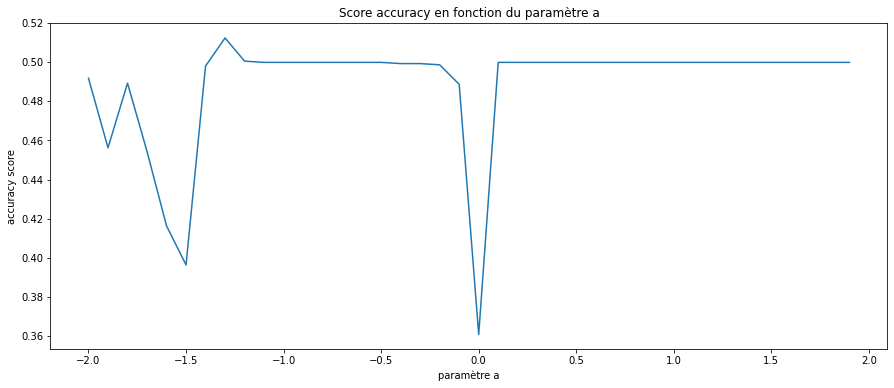

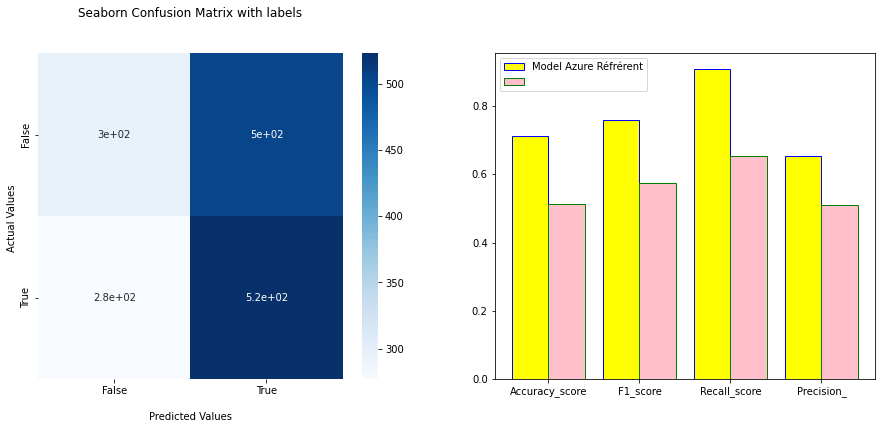

In [1]:
from functions import *
from keras import backend as K
import warnings
warnings.filterwarnings('ignore')
df_score = pd.read_csv('utile/df_score.csv',  index_col=0)
df_ = pd.read_csv('utile/data.csv')
# Authenticate the client using your key and endpoint  
Azure_embeding = pd.read_csv("utile/data_result.csv").drop(['text','label','Preprocessed text',
                                     'Scored Probabilities_0', 'Scored Probabilities_1',
                                                            'Scored Labels'], axis=1)

def activation(x):
    if x>=0:return 1
    else : return 0

def fit_perceptron(X, y, W, a):
    for i in range(len(X)):
        Y = np.dot(X[i],W)
        W = a*(Y-y[i])*X[i] + W   
    return W

def perception(X,W):
    y = [] 
    for i in range(len(X)):
        y.append(activation(np.dot(X[i],W)))
    return np.array(y)

X = pd.read_csv('utile/data_result.csv').drop(['text','label','Preprocessed text', 'Scored Labels'], 
                                              axis=1).values
W = np.random.randn(X.shape[1])
y = df_.label

acc = [accuracy_score(y, perception(X,fit_perceptron(X, y, W, a))) for a in np.arange(-2,2,.1)]


plt.figure(figsize=(15,6))
plt.title('Score accuracy en fonction du paramètre a')
plt.xlabel('paramètre a')
plt.ylabel('accuracy score')
plt.plot(np.arange(-2,2,.1), acc)
plt.show()

W_ = fit_perceptron(X, y, W, np.arange(-2,2,.1)[np.array(acc).argmax()])
y_pred = perception(X,W_)
acc_, f1_s, recall_s, precision = evaluate(y, y_pred)

Le perceptron est la brique fondamentale du deep learning, il était important d'évaluer un tel modèle, bien qu'il ne soit clairement pas adapté à notre problématique, les scores obtenu détiennent en effet un trop fort taux de Faux positif.

## Multilayers Perceptron (MLP)
<img src="https://drive.google.com/uc?export=view&id=1-4GwFWBGvEXAMSYgtLi3z_Gba3mpmCYT">

Le multilayers perceptron est un empilement par couche de perceptrons. Chaque couche possède un nombre de nœuds, tous ces nœuds étant connecté aux nœuds de la couche suivante. Cet empilement augmente la complexité de l'architecture en augmentant le nombre de poids à ajuster.

Observons l'entraînement de notre modèle sur une telle architecture.

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 1740      
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,762
Trainable params: 1,762
Non-trainable params: 0
______________________

2022-02-14 15:50:15.043829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-14 15:50:15.044192: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-14 15:50:15.213254: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-14 15:50:15.415953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 15:50:16.001770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


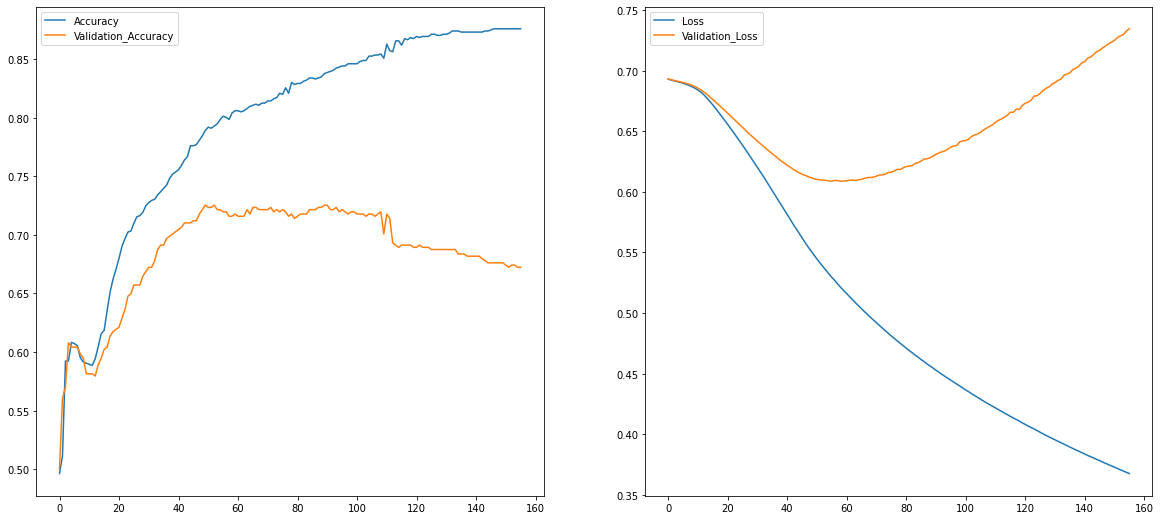

2022-02-14 15:50:22.815367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


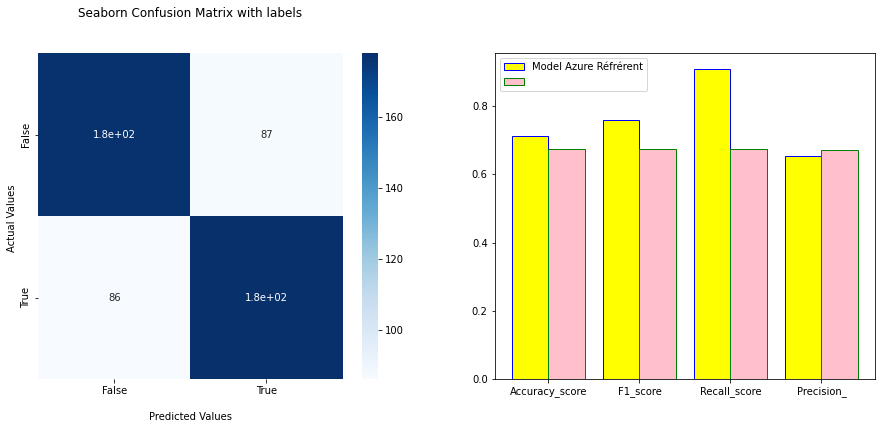

In [2]:
%time
# Instantiate a callback: here 5 epochs without improvement of the val_loss will stop training
callback = [EarlyStopping(monitor='val_loss', patience=100)]

X = np.array([np.array(x) for x in np.array(X)])
y = df_.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Create the Sequential object
def model_five_layers(input_dim, dropout=0.5, regul=0.0):
    kernel_regularizer=regularizers.l2(regul)
    model = Sequential()
    model.add(Dense(5, input_dim=input_dim, activation='relu', kernel_regularizer= kernel_regularizer))
    model.add(Dropout(dropout))
    model.add(Dense(3, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    return model

scoring = linear_model(np.array(X), y,callback, 0,0)[0]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 1740      
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dropout_5 (Dropout)         (None, 3)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,762
Trainable params: 1,762
Non-trainable params: 0
_________________________________________________________________


2022-02-14 15:52:50.751094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 15:52:50.979537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


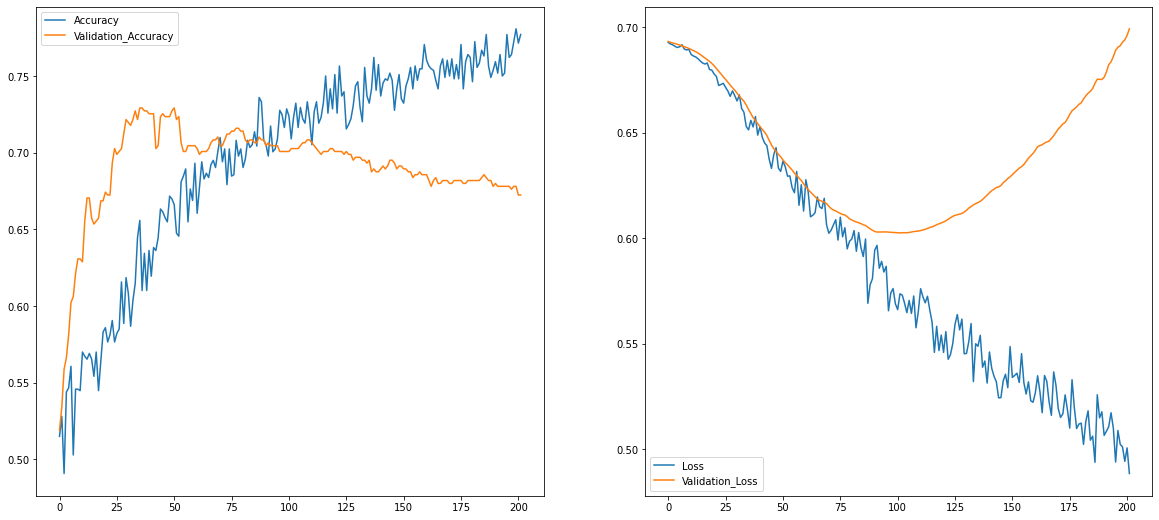

2022-02-14 15:53:00.632396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


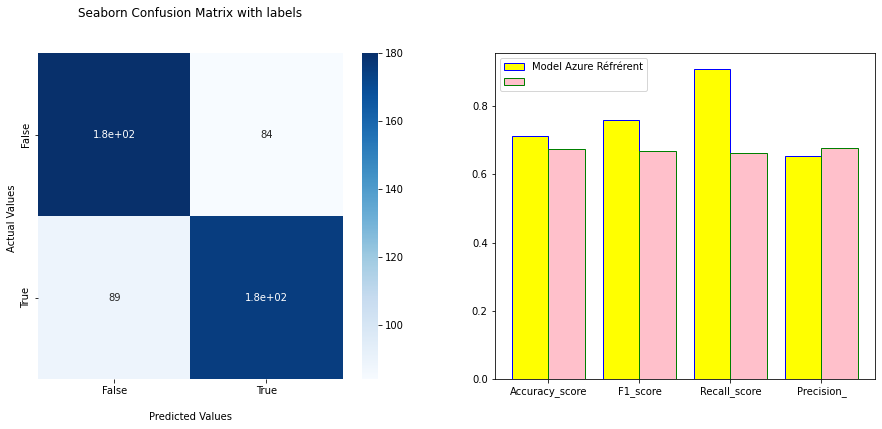

CPU times: user 9.18 s, sys: 5.68 s, total: 14.9 s
Wall time: 10.4 s


In [4]:
%%time
now = datetime.now()
acc_2, f1_2, recall_2, precision_2 = linear_model(X, y,callback,0.5,1)
time_2 = [datetime.now() - now][0].total_seconds()
df_score.loc[2] = ['MLP', acc_2, f1_2, recall_2, precision_2, time_2]

## Recurrent Neural Networks

<img src='https://drive.google.com/uc?export=view&id=1_mnewBQQ3pKWLpuoFEoILse6BdJ_kmot'>

### LSTM with Fasttext Embeding

2022-02-14 16:03:17.382148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:03:17.922618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:03:17.933013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:03:18.111440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:03:18.122229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:03:18.351136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:03:18.366360: I tensorflow/core/grappler/optimizers/cust

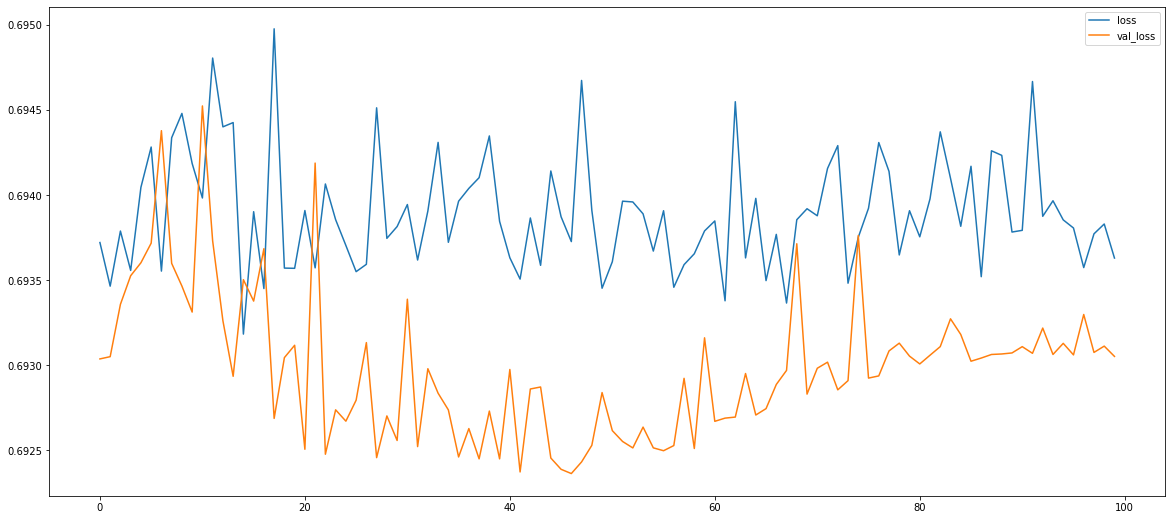

2022-02-14 16:06:58.055577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:06:58.185044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:06:58.192403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:06:58.372974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:06:58.380800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


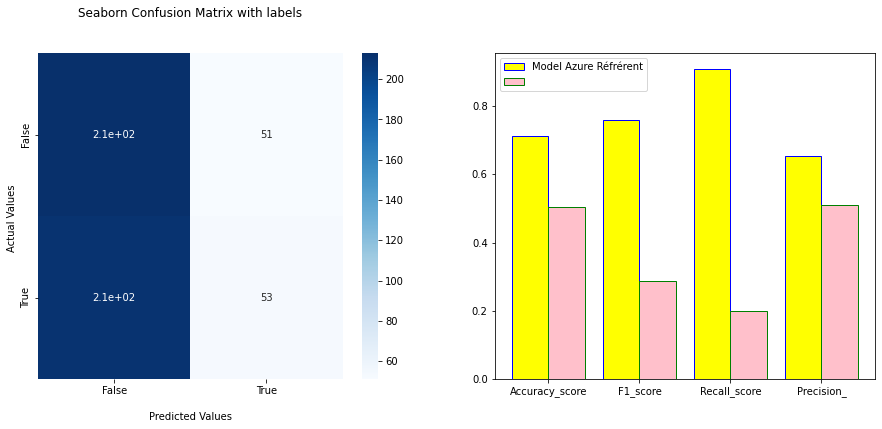

CPU times: user 3min 32s, sys: 1min, total: 4min 33s
Wall time: 3min 43s


In [11]:
%%time

now = datetime.now()
with open('utile/embeding_fasttext', 'rb') as handle:
    embeding_fasttext = pickle.load(handle)
    
    
X_train, X_test, y_train, y_test = train_test_split(embeding_fasttext, y, 
                                                    test_size=0.33, random_state=42, stratify=y)

def my_LSTM3():
    model = Sequential()
    model.add(Bidirectional(LSTM(units=12, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=12, return_sequences=False)))
    model.add(Dense(units=1, activation='sigmoid'))
    return model

model3 = my_LSTM3()
acc_3, f1_3, recall_3, precision_3 = train_plot(model3, X_train, y_train, X_test, y_test)
#time_3 = [datetime.now() - now][0].total_seconds()
#df_score.loc[3] = ['LSTM wt Fasttex', acc_3, f1_3, recall_3, precision_3, time_3]

### Word2Vec Emmbeding with LSTM

2022-02-14 16:09:47.205046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:09:47.754875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:09:47.765611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:09:47.861209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:09:47.872520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:09:47.988327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:09:48.003621: I tensorflow/core/grappler/optimizers/cust

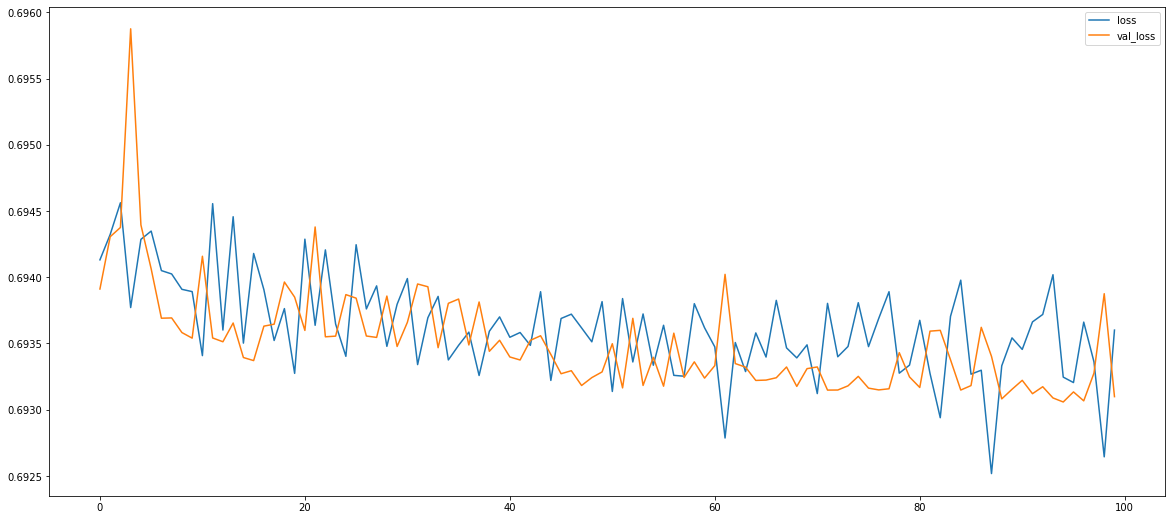

2022-02-14 16:11:31.240416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:11:31.365687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:11:31.373045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:11:31.451274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:11:31.459031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


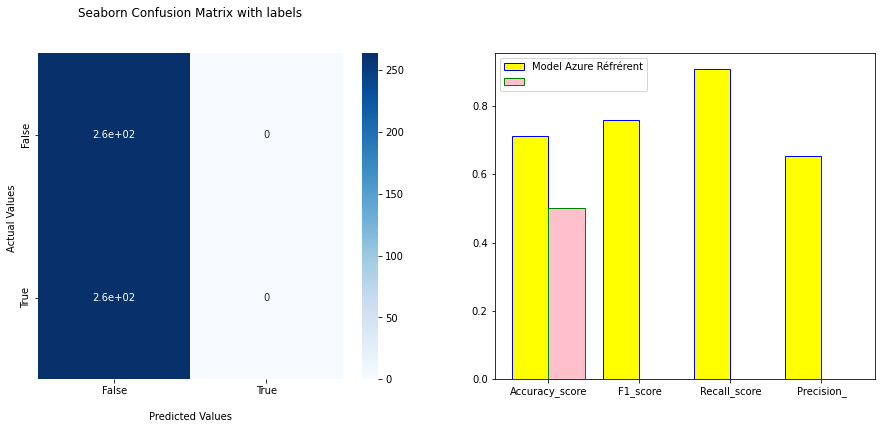

CPU times: user 1min 40s, sys: 38.9 s, total: 2min 19s
Wall time: 1min 46s


In [12]:
%%time
now = datetime.now()
with open('utile/embeding_w2v', 'rb') as handle:
    embeding_w2v = pickle.load(handle)
    
X_train, X_test, y_train, y_test = train_test_split(embeding_w2v, y, 
                                                    test_size=0.33, random_state=42, stratify=y)

def my_LSTM4():
    model = Sequential()
    model.add(Bidirectional(LSTM(units=8, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=8, return_sequences=False)))
    model.add(Dense(units=1, activation='sigmoid'))
    return model

model4 = my_LSTM4()
acc_4, f1_4, recall_4, precision_4 = train_plot(model4, X_train, y_train, X_test, y_test)
time_4 = [datetime.now() - now][0].total_seconds()
df_score.loc[4] = ['LSTM wt W2V', acc_4, f1_4, recall_4, precision_4, time_4]

### Keras Embeding with LSTM Bidirectional

Metal device set to: Apple M1 Max


2022-02-10 03:23:05.939810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-10 03:23:05.940506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-10 03:23:06.386248: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-10 03:23:07.727924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-10 03:23:08.294817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-10 03:23:08.355325: I tensorflow/core/grappler/o

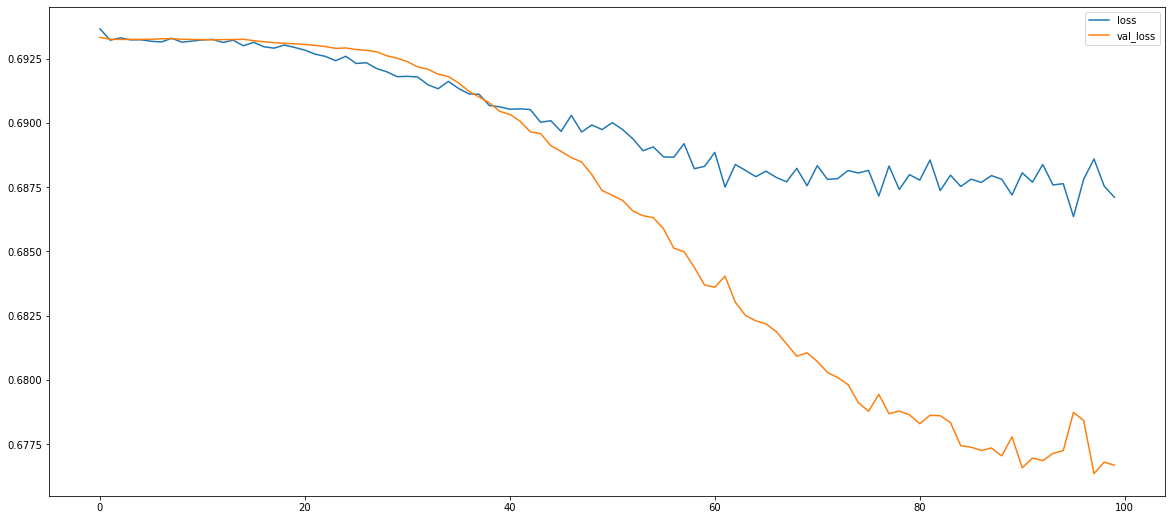

2022-02-10 03:25:16.614460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-10 03:25:16.741762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-10 03:25:16.748993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-10 03:25:16.827188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-10 03:25:16.834873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


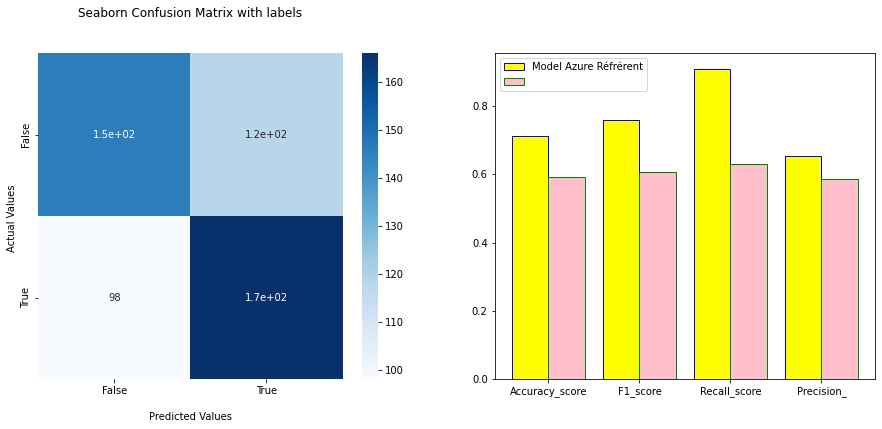

CPU times: user 2min 1s, sys: 44.7 s, total: 2min 46s
Wall time: 2min 11s


In [21]:
%%time
now = datetime.now()
dct = Dictionary(df_.text.apply(lambda x: x.lower().split()))

def return_index(X):
    keys = dct.token2id.keys()
    
    tokens = []
    for x in X.lower().split():
        if x in keys:
            tokens.append(dct.token2id[x])
    return tokens


y = df_.label
X = sequence.pad_sequences(df_.text.apply(return_index),
                                 value=0,
                                 padding='post', # to add zeros at the end
                                 truncating='post', # to cut the end of long sequences
                                 maxlen=32) # the length we want


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

def my_LSTM5(len_dict):
    model = Sequential()
    model.add(Embedding(input_dim=len_dict, output_dim=12, input_length=32))
    model.add(Bidirectional(LSTM(units=8, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=8, return_sequences=False)))
    model.add(Dense(units=1, activation='sigmoid'))
    return model

model5 = my_LSTM5(len(dct))
acc_5, f1_5, recall_5, precision_5 = train_plot(model5, X_train, y_train, X_test, y_test)
time_5 = [datetime.now() - now][0].total_seconds()
df_score.loc[5] = ['LSTM wt KERAS', acc_5, f1_5, recall_5, precision_5, time_5]

## Transformers : BERT

Bidirectional Encoder Representations from Transformers, est un modèle de langage développé par Google en 2018.

BERT utilise une technique appelée Masked LM (MLM) qui masque aléatoirement des mots dans la phrase, puis il essaie de les prédire. Le masquage signifie que le modèle regarde dans les deux sens et qu’il utilise le contexte complet de la phrase, à gauche et à droite, afin de prédire le mot masqué.

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
2022-0

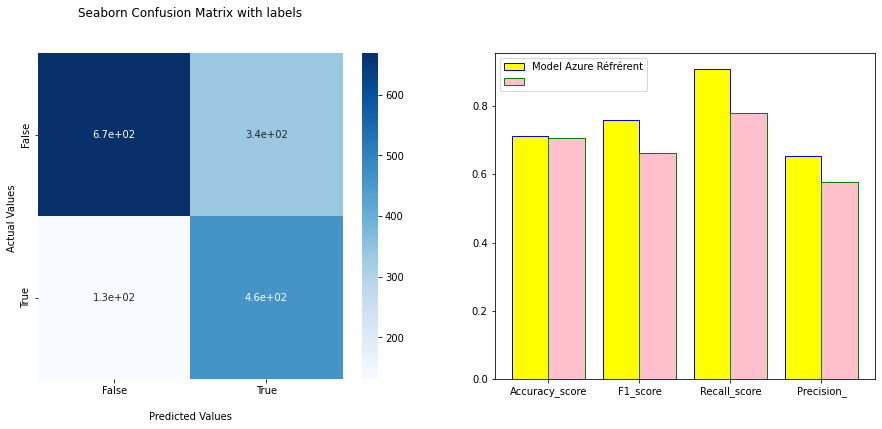

CPU times: user 2min 50s, sys: 3min 35s, total: 6min 25s
Wall time: 3min 14s


In [10]:
%%time
now = datetime.now()

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tf_bert_model = TFBertModel.from_pretrained("bert-base-uncased")
nlp_sentence_classif = pipeline('sentiment-analysis')

def pred(x):
    pred_ = nlp_sentence_classif(x)[0]['label']
    
    if pred_ == 'NEGATIVE' :return 0
    else :return 1
    
df_['pred'] = df_.text.apply(pred)
acc_7, f1_7, recall_7, precision_7 = evaluate(df_['pred'].values, df_.label, 'Bert')
time_7 = [datetime.now() - now][0].total_seconds()
df_score.loc[7] = ['Bert', acc_7, f1_7, recall_7, precision_7, time_7]

Ce modèle offre de très bons résultats et est simple d'utilisation, le modèle n'ayant pas été entraîné dans notre exemple sur notre corpus de texte.

# Comparaison des approche

+-----------------------+------------------+------------+----------------+--------------+----------------+
|                       |   Accuracy_score |   F1_score |   Recall_score |   Precision_ |   Learing_time |
|-----------------------+------------------+------------+----------------+--------------+----------------|
| Model Azure Réfrérent |             0.71 |       0.76 |           0.91 |         0.65 |         331.04 |
| Model Azure Simple    |             0.6  |       0.59 |           0.57 |         0.65 |           0.2  |
| MLP                   |             0.68 |       0.68 |           0.68 |         0.68 |          10.96 |
| LSTM wt Fasttex       |             0.5  |       0    |           0    |         0    |         126.96 |
| LSTM wt W2V           |             0.5  |       0    |           0    |         0    |          59.31 |
| LSTM wt KERAS         |             0.58 |       0.62 |           0.69 |         0.56 |         132.41 |
| Bert                  |            

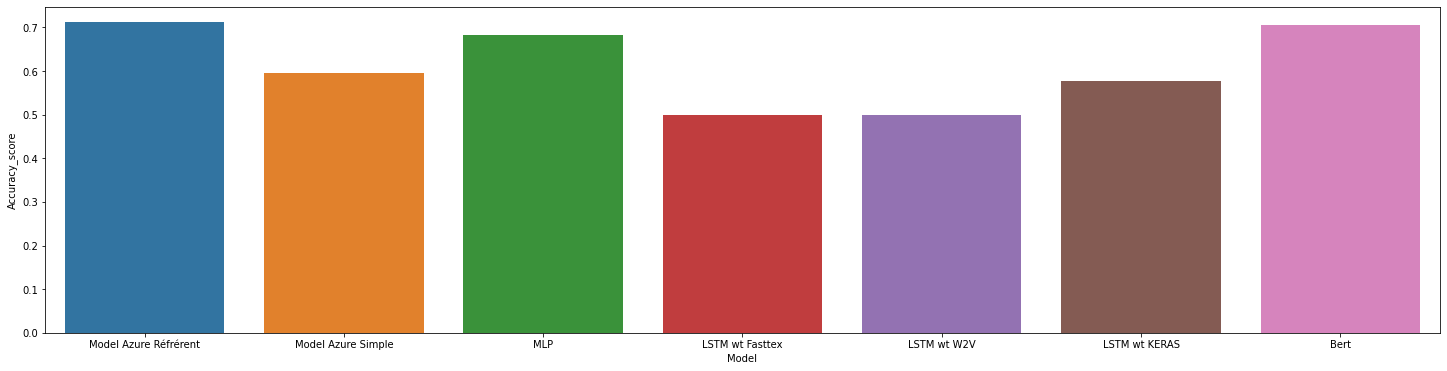

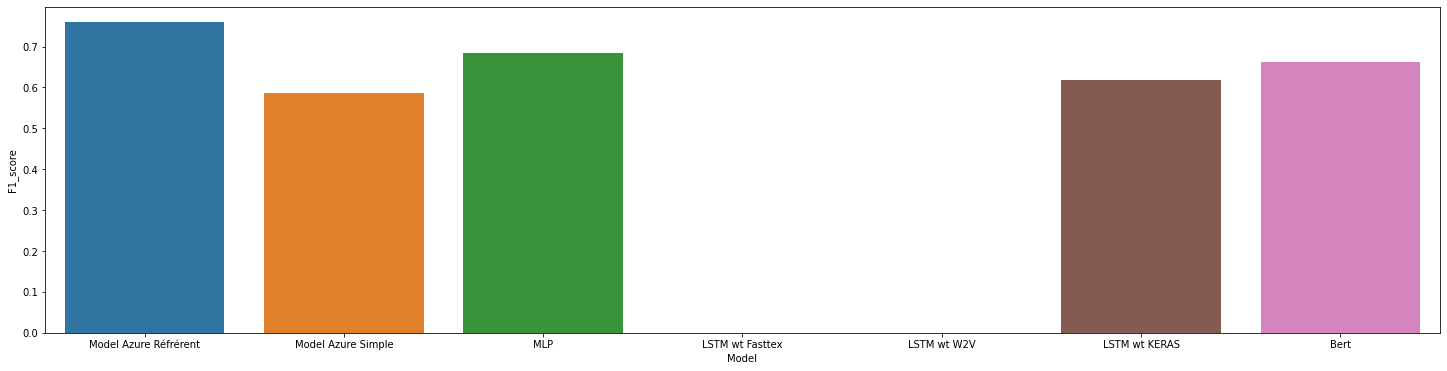

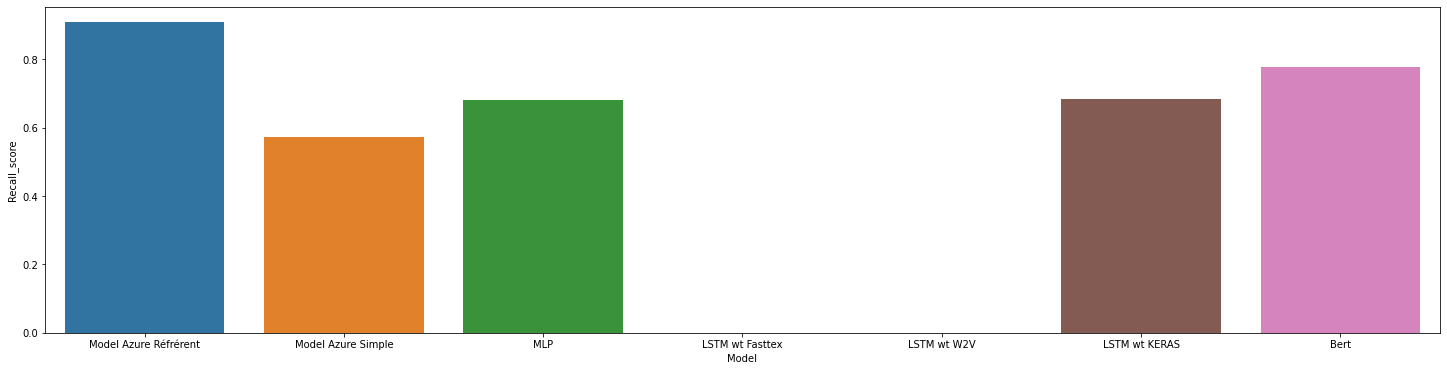

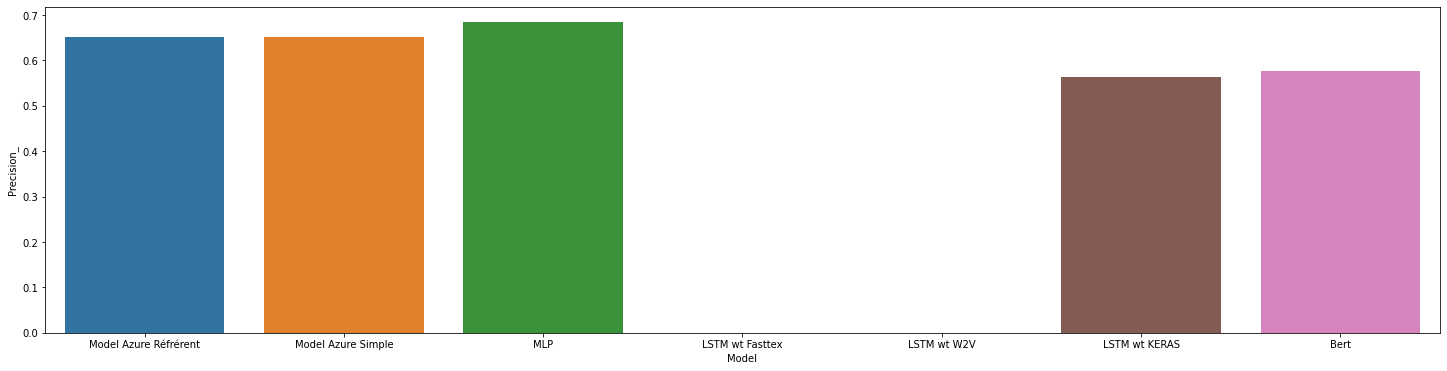

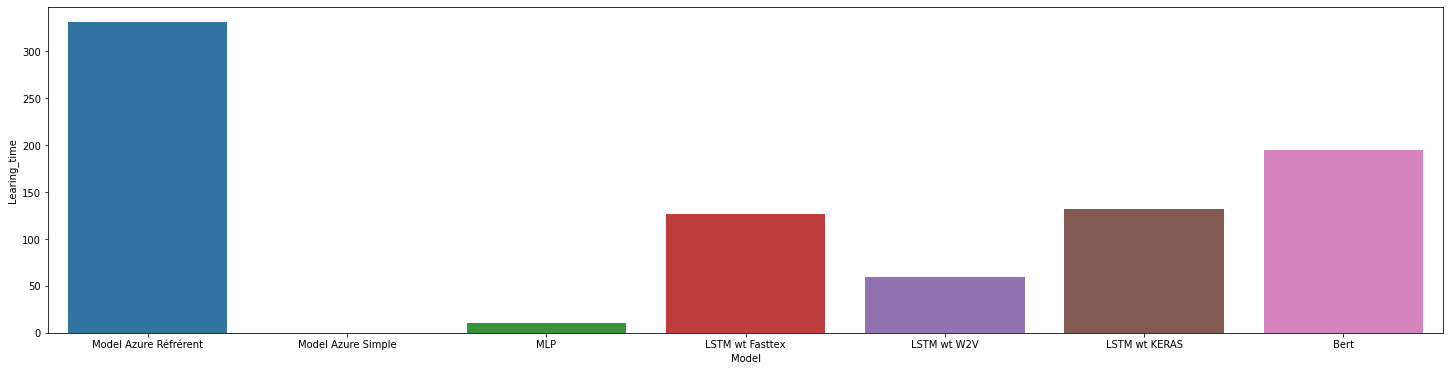

In [71]:
from tabulate import tabulate
import ipywidgets as widgets

indicateurs_model = [df_score.drop(['Model'], axis=1).iloc[i].values for i in range(7)]
model = df_score.Model.values
index = df_score.columns[1:]

tab_indicateurs = pd.DataFrame(np.around(indicateurs_model,decimals=2),index=model,columns = index)

print(tabulate(tab_indicateurs, headers = 'keys', tablefmt = 'psql'))

def scoring_plot(x):
    plt.figure(figsize=(25,6))
    sns.barplot(data=df_score, x = 'Model', y= x)
    plt.show()

plot = [scoring_plot(x) for x in df_score.columns[1:]]

Le modèle possédant les meilleures performances est le modèle proposé par le service cognitif de Microsoft Azure qui est donc simple à implémenter dans un code et possède le meilleur score de rappel, son seul inconvénient étant dans le temps d'acquisition des résultats de prédiction.

Parmi les modèles de deep learning créer via la bibliothèque tensorflow, la configuration possédant les meilleures performances est celle avec la couche d'embedding keras avec deux couche de LSTM bi directionnel.

Le modèle bert quant à lui se rapproche des performances du modèle Azure de référence tout en étant simple à implémenter et possédant un temps d'acquisition des résultats inférieur de moitié.